In [1]:
# Import necessary modules/libraries
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Set experiment parameters
np.random.seed(1)

# Distribution parameters
mean_a, std_a = 0.5, 1
mean_b, std_b = 0.0, 1

# Domain of alpha values to test
alpha_min, alpha_max = 0.01, 1
alphas = np.linspace(alpha_min, alpha_max, num=100)

# Sample size of each distribution
n = 75

# Generate samples from normal distributions
a = np.random.normal(mean_a, std_a, n)
b = np.random.normal(mean_b, std_b, n)
a.sort(), b.sort()
w_a = len(a) / (len(a) + len(b))
w_b = 1 - w_a

#Step Parameters
# U+ / U- > C+ / C-
u_plus = 1
u_minus = -1.1
c_plus = 1
c_minus = -1
print( "Assumption 1: U+ / U- > C+ / C- is", (u_plus // u_minus) > (c_plus // c_minus) )
domain = (-3, 3)
interval = 0.1

Assumption 1: U+ / U- > C+ / C- is False


In [3]:
# Single step optimization
from utils import opt_threshold, alt_fair_opt_step, opt_step, expected

x_alphas = []
y_mean_A, y_mean_B = [], []
y_thresh_A, y_thresh_B = [], []
y_util = []
y_pof = [] # Price of fairness

y_cat_1, y_cat_3, y_cat_4 = [], [], []
y_samples_1, y_samples_3, y_samples_4 = [], [], []

y_opt_util = []

B_temp = None

opt_util_A, opt_util_B = opt_step(a, u_plus, u_minus, c_plus, c_minus)[0], opt_step(b, u_plus, u_minus, c_plus, c_minus)[0]
opt_util_A, opt_util_B  = expected(opt_util_A, 1, -1.1), expected(opt_util_B, 1, -1.1)
opt_util_A, opt_util_B = np.sum(opt_util_A), np.sum(opt_util_B)
y_opt = w_a * opt_util_A + w_b * opt_util_B

for alpha in tqdm(alphas):
    results = alt_fair_opt_step(a, b, u_plus, u_minus, c_plus, c_minus, alpha, domain, interval)
    if results[0] is not None and results[1] is not None:
        A, B, thresh_A, thresh_B, max_util = results
        x_alphas.append(alpha)
        
        y_mean_A.append(np.mean(A))
        y_mean_B.append(np.mean(B))
        y_thresh_A.append(thresh_A)
        y_thresh_B.append(thresh_B)
        y_util.append(max_util)
        pof = 1 - (max_util/y_opt)
        y_pof.append(pof)

        delta_A = expected(a, c_plus, c_minus)
        condition1 = (delta_A >= 0) & (expected(a, u_plus, u_minus) >= 0) & (a > thresh_A)
        condition2 = (delta_A >= 0) & (expected(a, u_plus, u_minus) < 0) & (a > thresh_A)
        condition3 = (delta_A < 0) & (expected(a, u_plus, u_minus) < 0) & (a > thresh_A)

        cat1 = a[condition1]
        cat3 = a[condition2]
        cat4 = a[condition3]

        cat1 = [np.arange(0,len(cat1)), a[condition1]]
        cat3 = [np.arange(0,len(cat3)), a[condition2]]
        cat4 = [np.arange(0,len(cat4)), a[condition3]]

        y_cat_1.append(len(cat1[1]))
        y_cat_3.append(len(cat3[1]))
        y_cat_4.append(len(cat4[1]))

        y_samples_1.append(cat1)
        y_samples_3.append(cat3)
        y_samples_4.append(cat4)

        B_temp = B

100%|██████████| 100/100 [00:00<00:00, 127.59it/s]


In [4]:
def plot_graphs():
    
    # Traces
    thresholds_A = go.Scatter(x=x_alphas, y=y_thresh_A, mode='markers', name="Fair Threshold (A)")
    thresholds_B = go.Scatter(x=x_alphas, y=y_thresh_B, mode='markers', name="Fair Threshold (B)") 
    utilities = go.Scatter(x=x_alphas, y=y_util, mode='markers', name='Utility', yaxis='y2')

    # Create figure
    fig = go.Figure(data=[thresholds_A, thresholds_B, utilities])

    # Add toggle buttons
    fig.update_layout(
        height = 600,
        title='Single Step Thresholding Policy',
        xaxis=dict(title="Alpha"),
        yaxis=dict(title="Threshold"),
        yaxis2=dict(
            title="Utility",
            overlaying="y",
            side="right"
        ),
        legend=dict(
            x=0,          # Right edge of the plotting area
            #y=1,          # Top of the plotting area
            xanchor='right',   # Legend's left edge aligns at x=1
            yanchor='top'     # Legend's top edge aligns at y=1
        ),
        showlegend=True,
    )

    fig.show()
plot_graphs()


In [5]:
# Experiment #1
from experiment_1 import experiment_1


In [12]:
#Experiment #2
from experiment_2 import experiment_2
test_alpha = 0.55
experiment_2(a, b, u_plus, u_minus, c_plus, c_minus, test_alpha, domain, interval, w_a, w_b)

In [7]:
#Experiment #3
from experiment_3 import experiment_3
test_alpha = 0.55
data = experiment_3(a, b, u_plus, u_minus, c_plus, c_minus, test_alpha, domain, interval, w_a, w_b)
print(data[0.8])
diff = list(set(data[0.8]) - set(data[0.9]))
print(f'Difference between 0.8 and 0.9: {diff}')

Threshold 3.0: 7.087693573488043
7.087693573488043 + 0.0
Cat 1 Util: []
Total: 0
C1:    0
C2:    0
C3:    0
C4:    0

Threshold 2.9: 7.087693573488043
7.087693573488043 + 0.0
Cat 1 Util: []
Total: 0
C1:    0
C2:    0
C3:    0
C4:    0

Threshold 2.8: 7.087693573488043
7.087693573488043 + 0.0
Cat 1 Util: []
Total: 0
C1:    0
C2:    0
C3:    0
C4:    0

Threshold 2.7: 7.087693573488043
7.087693573488043 + 0.0
Cat 1 Util: []
Total: 0
C1:    0
C2:    0
C3:    0
C4:    0

Threshold 2.6: 7.16626581817753
6.227293073823803 + 0.9389727443537272
Cat 1 Util: [0.46806669 0.47090605]
Total: 2
C1:    2
C2:    0
C3:    0
C4:    0

Threshold 2.5: 7.16626581817753
6.227293073823803 + 0.9389727443537272
Cat 1 Util: [0.46806669 0.47090605]
Total: 2
C1:    2
C2:    0
C3:    0
C4:    0

Threshold 2.4: 7.16626581817753
6.227293073823803 + 0.9389727443537272
Cat 1 Util: [0.46806669 0.47090605]
Total: 2
C1:    2
C2:    0
C3:    0
C4:    0

Threshold 2.3: 7.16626581817753
6.227293073823803 + 0.938972744353727

In [8]:
print(np.sum(data[0.8]))
print(np.sum(data[0.9]))
print(len(data[0.8]))
print(len(data[0.9]))


11.158797661664432
10.389919213602747
30
27


In [9]:
# Plots
def plot_fairness(show_means=False, show_fair_thresholds=False, show_pof=False, show_utility=False, show_categories=False, show_plot2=False, alpha_idx=0):
    fig = plt.figure(figsize=(15, 6))

    if show_plot2: 
        ax1 = plt.subplot(1, 2, 1)
        ax2 = plt.subplot(1, 2, 2) 
        #plt.gcf().set_size_inches(12, 10)
        if alpha_idx < len(x_alphas):
            current_alpha = x_alphas[alpha_idx]
            util_cat1 = np.sum(expected(expected(y_samples_1[alpha_idx][1], c_plus, c_minus), u_plus, u_minus))
            util_cat4 = np.sum(expected(expected(y_samples_4[alpha_idx][1], c_plus, c_minus), u_plus, u_minus))
            if alpha_idx < len(y_samples_1):
                ax2.scatter(y_samples_1[alpha_idx][0], y_samples_1[alpha_idx][1], color='green', s=100, marker='D', 
                            label=f'Sample 1 (α={current_alpha:.2f})', zorder=5)
            if alpha_idx < len(y_samples_3):
                ax2.scatter(y_samples_3[alpha_idx][0], y_samples_3[alpha_idx][1], color='red', s=100, marker='D', 
                            label=f'Sample 3 (α={current_alpha:.2f})', zorder=5)
            if alpha_idx < len(y_samples_4):
                ax2.scatter(y_samples_4[alpha_idx][0], y_samples_4[alpha_idx][1], color='purple', s=100, marker='D', 
                            label=f'Sample 4 (α={current_alpha:.2f})', zorder=5)
        #ax2.annotate(f'Category 1 Util: {util_cat1:.2f}; Category 4 Util: {util_cat4:.2f}; sum of Util: {util_cat1 + util_cat4:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12)
        ax2.legend()
        ax2.set_title(f'Sample Distribution for α={current_alpha:.2f}')
    else:
        ax1 = plt.subplot(1, 1, 1) 

    if show_means:
        ax1.plot(0, mean_a, 'ro', label='Initial μ(A)')
        ax1.plot(0, mean_b, 'bo', label='Initial μ(B)')
        ax1.plot(x_alphas, y_mean_A, label="Fair μ(A)'", color='red')
        ax1.plot(x_alphas, y_mean_B, label="Fair μ(B)'", color='blue') 
    
    if show_fair_thresholds:
        ax1.scatter(x_alphas, y_thresh_A, label="Fair Threshold (A)", color='orange')
        ax1.scatter(x_alphas, y_thresh_B, label="Fair Threshold (B)", color='yellow', alpha=0.4)
    
    if show_pof:
        ax1.scatter(x_alphas, y_pof, label='Price of Fairness', color='blue')
    
    if show_categories:
        ax1.plot(x_alphas, y_cat_1, label='# of Category 1', color='red', linestyle='--', marker='o')
        ax1.plot(x_alphas, y_cat_3, label='# of Category 2', color='darkgreen', linestyle='--', marker='^')
        ax1.plot(x_alphas, y_cat_4, label='# of Category 4', color='darkred', linestyle='--', marker='s')
    
    if show_utility:
        ax1b = ax1.twinx()
        ax1b.scatter(x_alphas, y_util, label='Total Utility', color='green', linewidth=2)
        ax1b.set_ylabel('Total Utility')
        ax1b.tick_params(axis='y', labelcolor='green')
        #ax1b.scatter(x_alphas, y_opt_util, label='Optimal Utility', color='black', linestyle='--', marker='^')
        
        # Combine legends from both axes
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax1b.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
    else:
        ax1.legend()

    ax1.set_xlabel("α (Fairness Threshold)")
    ax1.set_ylabel("Metric Value")
    ax1.grid(True) 
    ax1.set_title("Fair vs. Optimal Means under Varying Fairness Constraint α") 

    #plt.title("Fair vs. Optimal Means under Varying Fairness Constraint α")
    plt.tight_layout()
    plt.show()

# Toggle widgets
means_toggle = widgets.Checkbox(value=False, description='Show Means')
fair_thresholds_toggle = widgets.Checkbox(value=False, description='Show Fair Thresholds')
pof_toggle = widgets.Checkbox(value=False, description='Show PoF')
utility_toggle = widgets.Checkbox(value=False, description='Show Utility')
categories_toggle = widgets.Checkbox(value=False, description='Show Categories')
plots_toggle = widgets.Checkbox(value=False, description='Show Plots')

alpha_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(alphas),
    step=1,
    description='α Index:',
    continuous_update=False,
    readout_format='d'
)

plus_button = widgets.Button(description='+')
minus_button = widgets.Button(description='-')

# Button click event handlers
def increase_value(b):
    if alpha_slider.value < alpha_slider.max:
        alpha_slider.value += alpha_slider.step

def decrease_value(b):
    if alpha_slider.value > alpha_slider.min:
        alpha_slider.value -= alpha_slider.step

plus_button.on_click(increase_value)
minus_button.on_click(decrease_value)

# Display everything together
display(widgets.HBox([minus_button, plus_button]))

ui = widgets.HBox([means_toggle, fair_thresholds_toggle, pof_toggle, utility_toggle, categories_toggle, plots_toggle, alpha_slider])
out = widgets.interactive_output(plot_fairness, {
    'show_means': means_toggle,
    'show_fair_thresholds': fair_thresholds_toggle,
    'show_pof': pof_toggle,
    'show_utility': utility_toggle,
    'show_categories': categories_toggle,
    'show_plot2': plots_toggle,
    'alpha_idx': alpha_slider,
})

display(ui, out)

Output()

ValueError: x and y must be the same size

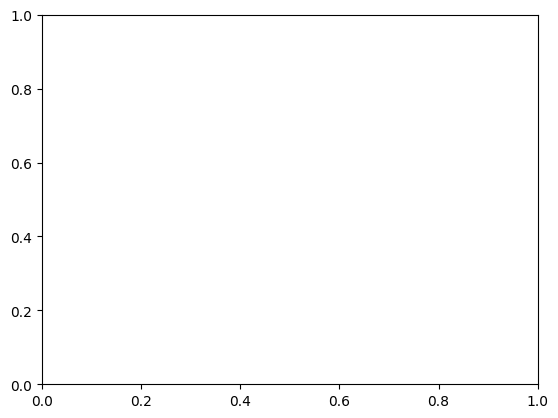

In [10]:
### Experiment where alpha and the threshold of B is fixed while we vary the threshold of A

x_thresh_A = []
thresh_B = y_thresh_B[-1]
y_means_diff = []

from utils import expected
delta_A = expected(a, c_plus, c_minus)
delta_B = expected(b, c_plus, c_minus)

B = np.where(b > thresh_B, b + delta_B, b)
util_B = np.sum(expected(B, u_plus, u_minus))
util_A = []
max_A = None
max_util = None

c1 = []
c3 = []
c4 = []

all_utilities = []
thresholds = np.arange(domain[0], domain[1], interval)
for threshold in thresholds:
    alpha = 0.54
    A = np.where(a > threshold, a + delta_A, a)
    diff = np.abs(np.mean(A) - np.mean(B))
    y_means_diff.append(diff)
    utility = np.sum(expected(A, u_plus, u_minus))
    if max_util is None or utility > max_util:
        condition1 = (delta_A >= 0) & (expected(a, u_plus, u_minus) >= 0)
        condition2 = (delta_A >= 0) & (expected(a, u_plus, u_minus) < 0)
        condition3 = (delta_A < 0) & (expected(a, u_plus, u_minus) < 0)

        c1_indices = np.where(condition1)[0]
        c3_indices = np.where(condition2)[0]
        c4_indices = np.where(condition3)[0]

        c1 = [c1_indices, a[c1_indices] + expected(a, u_plus, u_minus)[c1_indices]]
        c3 = [c3_indices, a[c3_indices] + expected(a, u_plus, u_minus)[c3_indices]]
        c4 = [c4_indices, a[c4_indices] + expected(a, u_plus, u_minus)[c4_indices]]

        max_util = utility
        max_A = A
    util_A.append(utility)
    x_thresh_A.append(threshold)

y_means_diff = np.array(y_means_diff)
x_thresh_A = np.array(x_thresh_A)

index = np.where(y_means_diff < alpha)[0]
x_util_thresh_A = x_thresh_A
x_util_thresh_A = x_thresh_A
w_a = len(a) / ( len(a) + len(b) )
w_b = 1 - w_a
total_util = w_a * np.array(util_A) + w_b * util_B
total_util = total_util[index]

plt.scatter(x_util_thresh_A, total_util, label='Total Utility', color='green')
plt.legend()
plt.xlabel("Threshold A")
plt.ylabel("Total Utility")
plt.title("Threshold A with Fixed Threshold B vs Total Utility")


In [ ]:
### Experiment where the threshold of B is fixed while we track utility and difference in means

plt.plot(x_thresh_A, y_means_diff, label='Mean', color='red')
plt.axhline(y=alpha, label='Alpha', color='black', linestyle='--')
plt.fill_between(x_thresh_A, y_means_diff, alpha, where=(y_means_diff > alpha), color='lightblue', alpha=1, label='Violates Fairness Constraint')
plt.xlabel("Threshold A")
plt.ylabel("Mean Difference |A - B|")
plt.title("Threshold A with Fixed Threshold B vs Mean Difference")
plt.legend()

ax2 = plt.gca().twinx()
ax2.scatter(x_util_thresh_A, total_util, label='Utility at Threshold', color='green')
ax2.set_ylabel('Utility')
ax2.legend()

In [ ]:
### Experiment where the threshold of B is fixed while we track utility and difference in means

plt.plot(x_thresh_A, y_means_diff, label='Mean', color='red')
plt.axhline(y=alpha, label='Alpha', color='black', linestyle='--')
plt.fill_between(x_thresh_A, y_means_diff, alpha, where=(y_means_diff > alpha), color='lightblue', alpha=1, label='Violates Fairness Constraint')
plt.xlabel("Threshold A")
plt.ylabel("Mean Difference |A - B|")
plt.title("Threshold A with Fixed Threshold B vs Mean Difference")
plt.legend()

ax2 = plt.gca().twinx()
ax2.scatter(x_util_thresh_A, total_util, label='Utility at Threshold', color='green')
ax2.set_ylabel('Utility')
ax2.legend()

In [ ]:
a = np.array(a)
indices = np.arange(len(a))
plt.scatter(c1[0], c1[1], color='red', marker='x', label='Category 1')
plt.scatter(c3[0], c3[1], color='blue', marker='x', label='Category 3')
plt.scatter(c4[0], c4[1], color='green', marker='x', label='Category 4')


plt.scatter(indices, a, color='black', alpha=0.5, marker='o', label='A before policy')
#plt.scatter(indices, max_A, color='red', marker='x', label='A after policy')
#plt.axhline(y=-1.5, color='black', linestyle='--')
#plt.axhline(y=0.8, color='black', linestyle='--')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Distribution of A Before and After Policy")

In [ ]:
# Define conditions
condition1 = (delta_A >= 0) & (expected(a, u_plus, u_minus) >= 0)
condition2 = (delta_A >= 0) & (expected(a, u_plus, u_minus) < 0)
condition3 = (delta_A < 0) & (expected(a, u_plus, u_minus) < 0)

# Get indices
cat1_ind = np.where(condition1)[0]
cat3_ind = np.where(condition2)[0]
cat4_ind = np.where(condition3)[0]

# Compute categories
cat1 = [cat1_ind, a[cat1_ind] + expected(a, u_plus, u_minus)[cat1_ind]]
cat3 = [cat3_ind, a[cat3_ind] + expected(a, u_plus, u_minus)[cat3_ind]]
cat4 = [cat4_ind, a[cat4_ind] + expected(a, u_plus, u_minus)[cat4_ind]]

# Plot
plt.scatter(cat1[0], cat1[1], color='red', marker='x', label='Category 1')
plt.scatter(cat3[0], cat3[1], color='blue', marker='x', label='Category 3')
plt.scatter(cat4[0], cat4[1], color='green', marker='x', label='Category 4')

# Draw line at smallest cat1 value
if len(cat1[1]) > 0:  # Check if cat1 has any points
    min_cat1_value = np.min(cat1[1])
    plt.axhline(y=min_cat1_value, color='red', linestyle='--', alpha=0.7, 
                label=f'Min Cat1 = {min_cat1_value:.3f}')

plt.legend()
plt.show()

In [ ]:
### Experiment where alpha and the threshold of B is fixed while we vary the threshold of A

x_thresh_A = []
thresh_B = y_thresh_B[-1]
y_means_diff = []

from utils import expected
delta_A = expected(a, c_plus, c_minus)
delta_B = expected(b, c_plus, c_minus)

B = np.where(b > thresh_B, b + delta_B, b)
util_B = np.sum(expected(B, u_plus, u_minus))


all_utilities = []
thresholds = np.arange(domain[0], domain[1], interval)

temp_list = [0.39, 1]
for alpha in temp_list:
    utility = []
    for threshold in thresholds:
        A = np.where(a > threshold, a + delta_A, a)
        util_A = np.sum(expected(A, u_plus, u_minus))
        utility.append(util_A + util_B)
    x_thresh_A.append(threshold)
    all_utilities.append(utility)
print(all_utilities[0]==all_utilities[1])

base = all_utilities[0]
temp_list = np.arange(0.39, 1, 0.1)
all_utilities = []
for alpha in temp_list:
    utility = []
    for threshold in thresholds:
        A = np.where(a > threshold, a + delta_A, a)
        util_A = np.sum(expected(A, u_plus, u_minus))
        utility.append(util_A + util_B)
    x_thresh_A.append(threshold)
    all_utilities.append(utility)

for i in all_utilities:
    if i != base:
        print("Not equal")
        break



